In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
x = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
estimator = KNeighborsClassifier(n_neighbors=1)
estimator.fit(x, y)
estimator.predict([[1]])

array([0])

In [3]:
# 鸢尾花种类预测
# 特征值--4个：花瓣、花萼的长度、宽度
# 目标值--3个：setosa, vericolor, virginica
# 数据集包含150行数据、每个种类各50行

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))
iris

<class 'sklearn.utils.Bunch'>


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1, '鸢尾花种类分布图')

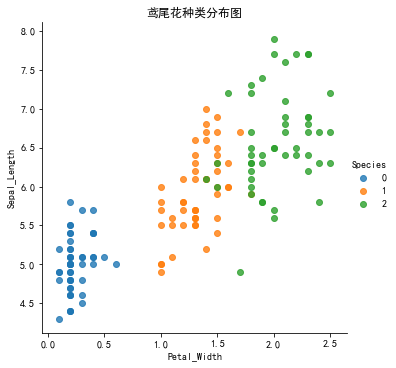

In [10]:
iris_d = pd.DataFrame(iris.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris_d['Species'] = iris.target

plt.rcParams['font.sans-serif'] = ['SIMHEI']
sns.lmplot('Petal_Width', 'Sepal_Length', data=iris_d, hue='Species', fit_reg=False)
plt.xlabel('Petal_Width')
plt.ylabel('Sepal_Length')
plt.title('鸢尾花种类分布图')

In [17]:
# 数据集划分
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2, random_state=22)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
estimator = KNeighborsClassifier(n_neighbors=8)
estimator.fit(x_train, y_train)
# 模型评估
# 方法1：比对真实值和预测值
y_predict = estimator.predict(x_test)
print("比对真实值和预测值：\n", y_predict == y_test)

# 方法二：直接计算准确率
score = estimator.score(x_test, y_test)
print("准确率为：\n", score)

比对真实值和预测值：
 [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]
准确率为：
 0.9333333333333333


In [18]:
#交叉验证、网格搜索
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()
param_dict = {"n_neighbors": [1, 3, 5]}
estimator = GridSearchCV(estimator, param_grid=param_dict, cv=3)
estimator.fit(x_train, y_train)
# y_predict = estimator.predictct(x_test)
score = estimator.score(x_test, y_test)
print("准确率为：\n", score)

准确率为：
 0.9333333333333333


C:\Users\17634\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
estimator.best_score_


0.975

In [20]:
estimator.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
estimator.cv_results_

{'mean_fit_time': array([0.00066717, 0.00100136, 0.00066749]),
 'std_fit_time': array([4.71764939e-04, 5.84003864e-07, 4.71988598e-04]),
 'mean_score_time': array([0.00523893, 0.00199874, 0.00233229]),
 'std_score_time': array([4.58259887e-03, 4.05233662e-07, 4.72831485e-04]),
 'param_n_neighbors': masked_array(data=[1, 3, 5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}],
 'split0_test_score': array([1., 1., 1.]),
 'split1_test_score': array([0.925, 0.975, 0.975]),
 'split2_test_score': array([0.94871795, 0.8974359 , 0.94871795]),
 'mean_test_score': array([0.95833333, 0.95833333, 0.975     ]),
 'std_test_score': array([0.03152126, 0.04348592, 0.02092927]),
 'rank_test_score': array([2, 2, 1])}